# 1. 用pd库读取并处理EC_number的csv数据

## (1). 读取csv数据

    Entry  EC number                                           Sequence
0  P51451   2.7.10.2  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...
1  C7C422    3.5.2.6  MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...
2  Q07457   2.3.2.27  MTAEPATKKIKLELSDPSEPLTQSDVIAFQKEALFRCINRRRVDFE...
3  Q07009  3.4.22.53  MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...
4  Q9TTH8  3.4.22.54  MPTVISASVAPRTGAEPRSPGPIAQAAQGKGTEAGGGNPSGIYSAI...
1022
4
整个文件的序列个数为： 227362


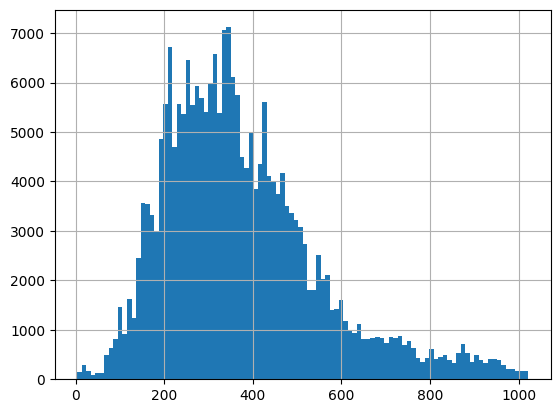

In [17]:
# 利用pandas库读取csv文件，格式为（Entry	EC number	Sequence）

import pandas as pd
import numpy as np
import re
import os

# 读取csv文件
df = pd.read_csv('train_data/split100.csv', sep='\t')
print(df.head())

# 读取EC number列
ec = df['EC number']
# 读取Sequence列
seq = df['Sequence']
# 读取Entry列
entry = df['Entry']
# 输出Sequence列长度的最大值和最小值
print(seq.str.len().max())
print(seq.str.len().min())
print("整个文件的序列个数为：", len(seq))

# 绘制Sequence列长度的直方图
import matplotlib.pyplot as plt
seq.str.len().hist(bins=100)
plt.show()


## (2). 处理不规则的EC number

In [18]:
# # 查看split70不规则的EC number，比如第18行
# row_18 = df.iloc[17]  # Python 的索引是从 0 开始的，所以第18行实际上是索引 17
# print(row_18['EC number'])

# 查看split100不规则的EC number，比如第35行
row_11 = df.iloc[33]  # Python 的索引是从 0 开始的，且有一行是标题
print(row_11['EC number'])

2.3.1.23;2.3.1.n6;2.3.1.121;2.3.1.67;2.3.1.n7


In [20]:
# 处理上述不规则的EC number，保留其分号前的第一个EC number
def process_ec_number(ec_number):
    # 如果 'EC number' 包含分号，只保留第一个
    if ';' in ec_number:
        return ec_number.split(';')[0]
    # 否则，直接返回 'EC number'
    else:
        return ec_number

# 对 'EC number' 列应用 process_ec_number 函数
df['EC number'] = df['EC number'].apply(process_ec_number)

In [21]:
# 查看split100不规则的EC number，比如第35行
row_11 = df.iloc[33]  # Python 的索引是从 0 开始的，且有一行是标题
print(row_11['EC number'])

2.3.1.23


## (3). 查看df['EC number']的统计信息

In [22]:
# 统计 'EC number' 列中每个值的出现次数
ec_counts = df['EC number'].value_counts()
print(ec_counts[:20])

EC number
2.7.7.6     2156
7.1.2.2     2149
2.7.11.1    2110
3.6.4.12    2070
5.2.1.8     1486
7.1.1.2     1388
3.6.4.13    1296
2.3.2.27    1191
3.1.26.4    1143
4.2.1.33    1078
5.6.1.7     1060
6.1.1.20    1006
4.2.1.20    1001
2.1.3.15     980
4.2.1.11     915
2.7.4.3      900
4.3.2.10     893
6.1.1.17     882
6.5.1.2      876
6.1.1.14     858
Name: count, dtype: int64


In [23]:
# 以'.'为分隔符，将EC number分为4个部分，分别为EC1、EC2、EC3、EC4，统计每个部分的值的出现次数
df['EC1'] = df['EC number'].apply(lambda x: x.split('.')[0])
df['EC2'] = df['EC number'].apply(lambda x: x.split('.')[1])
df['EC3'] = df['EC number'].apply(lambda x: x.split('.')[2])
df['EC4'] = df['EC number'].apply(lambda x: x.split('.')[3])
ec1_counts = df['EC1'].value_counts()
ec2_counts = df['EC2'].value_counts()
ec3_counts = df['EC3'].value_counts()
ec4_counts = df['EC4'].value_counts()
print(ec1_counts)
# print(ec2_counts)
# print(ec3_counts)
# print(ec4_counts)

EC1
2    84117
3    41696
1    28446
6    26267
4    23900
5    14645
7     8291
Name: count, dtype: int64


In [24]:
# 筛选EC1为2的数据
df_select = df[df['EC1'] == '2']
print(df_select.head())

     Entry EC number                                           Sequence EC1  \
0   P51451  2.7.10.2  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...   2   
2   Q07457  2.3.2.27  MTAEPATKKIKLELSDPSEPLTQSDVIAFQKEALFRCINRRRVDFE...   2   
8   Q3TTA7  2.3.2.27  MANSMNGRNPGGRGGNPRKGRILGIIDAIQDAVGPPKQAAADRRTV...   2   
10  P55217  2.5.1.48  MAVSSFQCPTIFSSSSISGFQCRSDPDLVGSPVGGSSRRRVHASAG...   2   
11  P10506  2.7.12.2  MFKRRRNPKGLVLNPNASVKSSDNDHKEELINNQKSFESNVEAFME...   2   

   EC2 EC3 EC4  
0    7  10   2  
2    3   2  27  
8    3   2  27  
10   5   1  48  
11   7  12   2  


统计可能出现的标签种类

In [8]:
# EC number一共4位，统计EC number每一位可能出现的数字种类
# 定义一个函数来获取 'EC number' 的每一位
def get_digits(ec_number):
    return ec_number.split('.')

# 对 'EC number' 列应用 get_digits 函数，并将结果转换为 DataFrame
digits_df = df_select['EC number'].apply(get_digits).apply(pd.Series)

# 初始化一个空的 set 来存储每一位的种类
digits_set = [set() for _ in range(4)]

# 遍历每一列，将每一列的值添加到对应的 set 中
for i in range(4):
    digits_set[i] = digits_set[i].union(digits_df[i].dropna().unique())

# 对每一位的种类进行排序，先尝试转换为整数，如果不能转换则忽略
digits_number_set = [sorted([int(digit) for digit in digits if digit.isdigit()]) for digits in digits_set]
# 打印每一位的数字种类
for i, digits in enumerate(digits_number_set):
    print(f"第 {i+1} 位的数字种类: {digits}")

def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
digits_Un_number_set = [sorted([digit for digit in digits if not is_int(digit)]) for digits in digits_set]
# 打印每一位的非数字种类
for i, digits in enumerate(digits_Un_number_set):
    print(f"第 {i+1} 位的非数字种类: {digits}")

第 1 位的数字种类: [2]
第 2 位的数字种类: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
第 3 位的数字种类: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 99]
第 4 位的数字种类: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 1

## (4). 将df数据处理成train_data.p文件

处理方法：只处理EC1 = 2的大家族，简化数据复杂度

In [15]:
print(df_select.head())
print(df_select.shape)

    Entry EC number                                           Sequence EC1  \
0  P51451  2.7.10.2  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...   2   
1  Q07457  2.3.2.27  MTAEPATKKIKLELSDPSEPLTQSDVIAFQKEALFRCINRRRVDFE...   2   
2  Q3TTA7  2.3.2.27  MANSMNGRNPGGRGGNPRKGRILGIIDAIQDAVGPPKQAAADRRTV...   2   
3  P55217  2.5.1.48  MAVSSFQCPTIFSSSSISGFQCRSDPDLVGSPVGGSSRRRVHASAG...   2   
4  P10506  2.7.12.2  MFKRRRNPKGLVLNPNASVKSSDNDHKEELINNQKSFESNVEAFME...   2   

  EC2 EC3 EC4  
0   7  10   2  
1   3   2  27  
2   3   2  27  
3   5   1  48  
4   7  12   2  
(84117, 7)


处理训练数据方法1：将一行数据扩充为四行，即添加none标记

In [14]:
import pickle
# 将df数据的EC number转化为标签，并保存到train_data_ec_label.p文件中
# 定义一个函数来转换 'EC number' 和 'Sequence' 列
def convert_row(row):
    # 将 'EC number' 分割成四个部分
    parts = row['EC number'].split('.')
    # 创建一个字典
    result = {
        'EC_number': [f'{parts[0]}',f'{parts[1]}',f'{parts[2]}',f'{parts[3]}'],
        'seq': row['Sequence']
    }
    return result

# 取出df中EC1=2的数据
df = df[df['EC1'] == '2'].reset_index(drop=True)
print("扩展前数据的示例：")
print(df.head())
print(df.shape)

# 扩充训练数据集
# 遍历df中的每一个数据，将其扩展为4个数据
# 如EC number为2.7.7.6，则扩充为4个数据，分别为2.7.7.6、2.7.7.none、2.7.none.none、2.none.none.none
# 创建一个新的 DataFrame 来存储扩展后的数据
df_expanded = pd.DataFrame()

# 遍历原始 DataFrame 中的每一行
for index, row in df.iterrows():
    # 获取 EC number
    ec_number = row['EC number']
    # 将 EC number 分割为四个部分
    parts = ec_number.split('.')
    # 创建一个列表来存储扩展后的 EC numbers
    expanded_ec_numbers = []
    for i in range(4):
        # 创建一个新的 EC number，其中第 i+1 个及之后的部分都被替换为 'none'
        new_ec_number = '.'.join(parts[:i+1] + ['none'] * (3-i))
        expanded_ec_numbers.append(new_ec_number)
    # 创建一个新的 DataFrame 来存储扩展后的 EC numbers
    df_new = pd.DataFrame({'EC number': expanded_ec_numbers})
    # 新增一个 'Sequence' 列，并将原始数据的 'Sequence' 复制到新的 DataFrame 中
    df_new['Sequence'] = row['Sequence']
    # 将新的 DataFrame 添加到 df_expanded 中
    df_expanded = pd.concat([df_expanded, df_new])

print("扩展后数据的示例：")
print(df_expanded.head())
print(df_expanded.shape)

# df_expanded 重建索引
df_expanded = df_expanded.reset_index(drop=True)

# 对 df_expanded 应用 convert_row 函数，并将结果转换为字典
data = df_expanded.apply(convert_row, axis=1).to_dict()


txt_file_path = 'train_data/train_data_EC1=2_v2.txt'
pickle_file_path = 'train_data/train_data_EC1=2_v2.p'
with open(txt_file_path, 'w') as file:
    # 遍历字典的键和值
    for key, value in data.items():
        # 将键和值写入文件
        file.write(f'{key}: {value}\n')

# 并写入.pickle文件
with open(pickle_file_path, 'wb') as file:
    pickle.dump(data, file)

扩展前数据的示例：
    Entry EC number                                           Sequence EC1  \
0  P51451  2.7.10.2  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...   2   
1  Q07457  2.3.2.27  MTAEPATKKIKLELSDPSEPLTQSDVIAFQKEALFRCINRRRVDFE...   2   
2  Q3TTA7  2.3.2.27  MANSMNGRNPGGRGGNPRKGRILGIIDAIQDAVGPPKQAAADRRTV...   2   
3  P55217  2.5.1.48  MAVSSFQCPTIFSSSSISGFQCRSDPDLVGSPVGGSSRRRVHASAG...   2   
4  P10506  2.7.12.2  MFKRRRNPKGLVLNPNASVKSSDNDHKEELINNQKSFESNVEAFME...   2   

  EC2 EC3 EC4  
0   7  10   2  
1   3   2  27  
2   3   2  27  
3   5   1  48  
4   7  12   2  
(28553, 7)
扩展后数据的示例：
          EC number                                           Sequence
0  2.none.none.none  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...
1     2.7.none.none  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...
2       2.7.10.none  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...
3          2.7.10.2  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...
0  2.none.none.none  MTAEPATKKIKLELSDPSEPLTQSDVIA

处理训练数据方法二：不进行none标记的填充

In [25]:
import pickle
# 将df数据的EC number转化为标签，并保存到train_data_ec_label.p文件中
# 定义一个函数来转换 'EC number' 和 'Sequence' 列
def convert_row(row):
    # 将 'EC number' 分割成四个部分
    parts = row['EC number'].split('.')
    # 创建一个字典
    result = {
        'EC_number': [f'{parts[0]}',f'{parts[1]}',f'{parts[2]}',f'{parts[3]}'],
        'seq': row['Sequence']
    }
    return result

# 取出df中EC1=2的数据
df = df[df['EC1'] == '2'].reset_index(drop=True)
# df 重建索引
df = df.reset_index(drop=True)
print(df.head())
print(df.shape)

# 对 df_expanded 应用 convert_row 函数，并将结果转换为字典
data = df.apply(convert_row, axis=1).to_dict()


txt_file_path = 'train_data/train_data_EC1=2_v2.txt'
pickle_file_path = 'train_data/train_data_EC1=2_v2.p'
with open(txt_file_path, 'w') as file:
    # 遍历字典的键和值
    for key, value in data.items():
        # 将键和值写入文件
        file.write(f'{key}: {value}\n')

# 并写入.pickle文件
with open(pickle_file_path, 'wb') as file:
    pickle.dump(data, file)

    Entry EC number                                           Sequence EC1  \
0  P51451  2.7.10.2  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...   2   
1  Q07457  2.3.2.27  MTAEPATKKIKLELSDPSEPLTQSDVIAFQKEALFRCINRRRVDFE...   2   
2  Q3TTA7  2.3.2.27  MANSMNGRNPGGRGGNPRKGRILGIIDAIQDAVGPPKQAAADRRTV...   2   
3  P55217  2.5.1.48  MAVSSFQCPTIFSSSSISGFQCRSDPDLVGSPVGGSSRRRVHASAG...   2   
4  P10506  2.7.12.2  MFKRRRNPKGLVLNPNASVKSSDNDHKEELINNQKSFESNVEAFME...   2   

  EC2 EC3 EC4  
0   7  10   2  
1   3   2  27  
2   3   2  27  
3   5   1  48  
4   7  12   2  
(84117, 7)


## (5). 创建EC lable和ctrl code的映射文件first_level_to_ctrl.p

In [16]:
label_dict = {}
label_dict['none'] = 0
start_code = 1
# 使用 for 循环和 range 函数来生成键和值
for i in range(1, 425):
    key = f'{i}'
    label_dict[key] = start_code
    start_code += 1

# 补充缺失的键值对
label_dict['n1'] = start_code
start_code += 1
label_dict['n2'] = start_code
start_code += 1
label_dict['n3'] = start_code
start_code += 1
label_dict['n4'] = start_code
start_code += 1
label_dict['n5'] = start_code
start_code += 1
label_dict['n6'] = start_code
start_code += 1
label_dict['n7'] = start_code
start_code += 1
label_dict['n8'] = start_code
start_code += 1
label_dict['n9'] = start_code
start_code += 1
label_dict['n10'] = start_code
start_code += 1
label_dict['n11'] = start_code
start_code += 1
label_dict['n12'] = start_code
start_code += 1
label_dict['STOP'] = start_code
start_code += 1
label_dict['PAD'] = 129406
print(label_dict)
# 文件路径
file_path = 'mapping_files/ec_level_to_ctrl_v2.p'
# 将所有的标签整理到一个字典中
txt_file_path = 'mapping_files/ec_level_to_ctrl_v2.txt'
pickle_file_path = 'mapping_files/ec_level_to_ctrl_v2.p'
# 创建.p文件
# 以增加模式打开文件
with open(txt_file_path, 'w') as file:
    # 遍历字典的键和值
    for key, value in label_dict.items():
        # 将键和值写入文件
        file.write(f'{key}: {value}\n')

# 并写入.pickle文件
with open(pickle_file_path, 'wb') as file:
    pickle.dump(label_dict, file)


{'none': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 81, '82': 82, '83': 83, '84': 84, '85': 85, '86': 86, '87': 87, '88': 88, '89': 89, '90': 90, '91': 91, '92': 92, '93': 93, '94': 94, '95': 95, '96': 96, '97': 97, '98': 98, '99': 99, '100': 100, '101

In [33]:
import random
label_num = random.randint(1,4)
print(label_num)

3
